## Optimising, training and testing models

In [134]:
'''This step is to import all the various libraries and tools to run these tests'''


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import statistics


After importing the various libraries the next step is to create the test and train data.
This will use the CSV file (Test - Train Modelling Data.csv) from the Pre-Processing step (Notebook 1 - Retirement Modelling - Data Pre-Processing - FINAL).

In [103]:
model_test_data = pd.read_csv('Test - Train Modelling Data.csv')

In [104]:
model_test_data.head()

,ID Key,Location,Grade Name,End Date,Gender,Date of Birth,Pension Scheme,Termination Reason,Date Eligible for Retirement,Retirement Difference,Age,Outcome,Location_cat,Grade Name_cat,Gender_cat,Pension Scheme_cat
0,1,WY,HEO,20/12/2017,M,14/03/1956,Other,RETIREMENT,14/03/2016,1.768688,61.769920,True,14,8,1,2
1,3,FY,G6,31/10/2013,M,21/07/1956,Other,RETIREMENT,21/07/2016,-2.721480,57.279752,True,5,5,1,2
2,4,PB,HEO,29/04/2021,M,09/05/1955,Alpha,RESIGNATION,05/04/2021,-0.013690,65.649534,False,10,8,1,0
3,5,GL,HEO,31/05/2014,M,31/03/1954,Other,RETIREMENT,31/03/2014,0.167012,60.168244,True,6,8,1,2
4,6,FY,SEO,07/06/2013,M,07/06/1953,Other,RETIREMENT,07/06/2013,0.000000,60.001232,True,5,11,1,2


In [105]:
x = model_test_data[['Location_cat','Grade Name_cat','Gender_cat','Pension Scheme_cat','Retirement Difference','Age']]
y = model_test_data[['Outcome']]

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.8)

#### The train-test data will now be used to optimise and run test, both single run and multi run tests, for each of the following models:

1. Random Forest
1. Support Vector Machines
1. Logistic Regression
1. K-Nearest Neighbor
1. XGBoost

# Random Forest Classifier

#### Optimising

In [107]:
'''Optimising the model to get the optimal hyperparameters'''

RF_model = RandomForestClassifier()
RF_model.fit(X_train, y_train)

<ipython-input-107-290425e06fc7>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, y_train)


RandomForestClassifier()

In [109]:
RF_y_predicted = RF_model.predict(X_test)

In [108]:
RF_model.score(X_test, y_test)

0.9048305695746215

In [110]:
RF_cm = confusion_matrix(y_test, RF_y_predicted)
RF_cm

array([[669,  72],
       [ 60, 586]], dtype=int64)

In [121]:
print('F1 Score: ', f1_score(y_test, RF_y_predicted))

F1 Score:  0.8987730061349695


In [143]:
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, RF_y_predicted)
auc_rfc = auc(rfc_fpr, rfc_tpr)

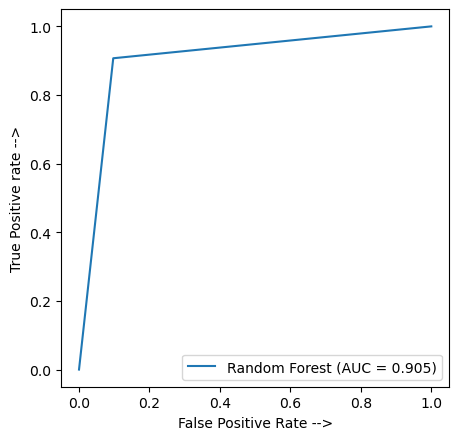

In [144]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='Random Forest (AUC = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

Text(69.0, 0.5, 'Truth')

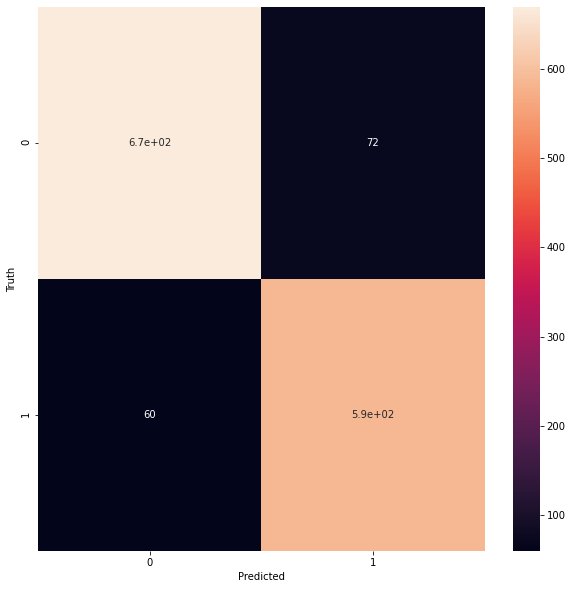

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(RF_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [112]:
param_grid_RF = [{
    'n_estimators':[10,20,30,40,50,60,70,80,90,100],
    'max_depth':[5,10,15,20],
    'max_features':[2,3,4,5,6]},]

RF_optimal_params = GridSearchCV(estimator=RF_model, param_grid=param_grid_RF, cv=10, n_jobs=-1)

RF_optimal_params.fit(X_train, y_train)
print(RF_optimal_params.best_params_)

{'max_depth': 10, 'max_features': 2, 'n_estimators': 60}


C:\Users\truek\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


#### Single Run

In [113]:
RF_model_opt = RandomForestClassifier(max_depth=10, max_features=2, n_estimators=60)
RF_model_opt.fit(X_train, y_train)

<ipython-input-113-ab37d929e904>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_opt.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features=2, n_estimators=60)

In [114]:
RF_model_opt.score(X_test, y_test)

0.9041095890410958

In [115]:
RF_y_predicted_opt = RF_model_opt.predict(X_test)

In [122]:
print('F1 Score: ', f1_score(y_test, RF_y_predicted_opt))

F1 Score:  0.8976135488837568


In [145]:
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, RF_y_predicted_opt)
auc_rfc = auc(rfc_fpr, rfc_tpr)

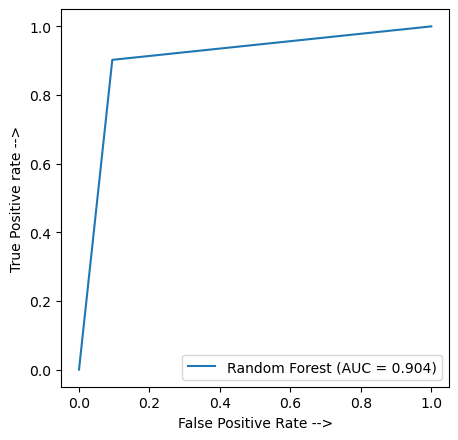

In [146]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='Random Forest (AUC = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

In [116]:
RF_cm_opt = confusion_matrix(y_test, RF_y_predicted_opt)
RF_cm_opt

array([[671,  70],
       [ 63, 583]], dtype=int64)

Text(69.0, 0.5, 'Truth')

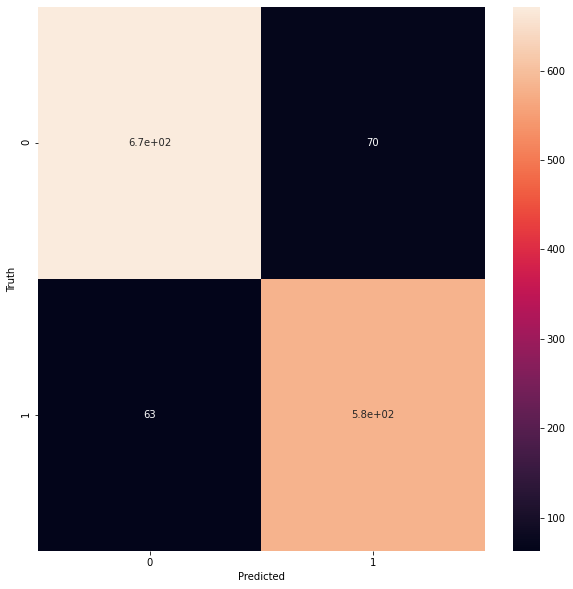

In [117]:
plt.figure(figsize=(10,10))
sns.heatmap(RF_cm_opt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Multi Runs

In [220]:

RF_accuracy=[]
RF_f1score=[]
RF_roc=[]

for i in range(100):
    RF_model_multi = RandomForestClassifier(max_depth=10, max_features=2, n_estimators=60)
    RF_model_multi.fit(X_train, y_train)
    
    RF_y_predicted_multi = RF_model_multi.predict(X_test)
    
    acc = accuracy_score(y_test, RF_y_predicted_multi)
    RF_accuracy.append(acc)
    
    f1 = f1_score(y_test, RF_y_predicted_multi)
    RF_f1score.append(f1)
    
    rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, RF_y_predicted_multi)
    auc_rfc = auc(rfc_fpr, rfc_tpr)
    RF_roc.append(auc_rfc)
    
    
    

<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was

<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was

<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model_multi.fit(X_train, y_train)
<ipython-input-220-3ecb0e5a6540>:7: DataConversionWarning: A column-vector y was

In [221]:
acc_average = statistics.mean(RF_accuracy)
f1_average = statistics.mean(RF_f1score)
roc_average = statistics.mean(RF_roc)

print(acc_average)
print(f1_average)
print(roc_average)

acc_max = max(RF_accuracy)
f1_max = max(RF_f1score)
roc_max = max(RF_roc)

print(acc_max)
print(f1_max)
print(roc_max)

acc_min = min(RF_accuracy)
f1_min = min(RF_f1score)
roc_min = min(RF_roc)

print(acc_min)
print(f1_min)
print(roc_min)

acc_stdev = np.std(RF_accuracy)
f1_stdev = np.std(RF_f1score)
roc_stdev = np.std(RF_roc)

print(acc_stdev)
print(f1_stdev)
print(roc_stdev)

0.9029271809661139
0.8966127066080645
0.9029846391998094
0.9077144917087239
0.9021406727828747
0.9080733507978089
0.893294881038212
0.8850931677018633
0.8925934746368183
0.0026618148240052965
0.0030753322837575392
0.0028161727082604473


## Support Vector Machines

#### Optimising

In [147]:
SVM_model = SVC()
SVM_model.fit(X_train, y_train)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [148]:
SVM_y_predicted = SVM_model.predict(X_test)

In [149]:
SVM_cm = confusion_matrix(y_test, SVM_y_predicted)
SVM_cm

array([[641, 100],
       [ 35, 611]], dtype=int64)

Text(69.0, 0.5, 'Truth')

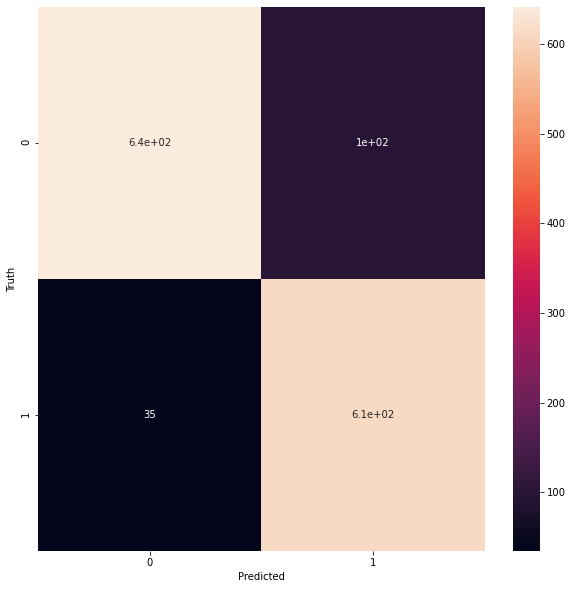

In [150]:
plt.figure(figsize=(10,10))
sns.heatmap(SVM_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [151]:
SVM_model.score(X_test, y_test)

0.9026676279740447

In [152]:
print('F1 Score: ', f1_score(y_test, SVM_y_predicted))

F1 Score:  0.9005158437730288


In [155]:
rfc_fpr_SVM, rfc_tpr_SVM, threshold_SVM = roc_curve(y_test, SVM_y_predicted)
auc_rfc_SVM = auc(rfc_fpr_SVM, rfc_tpr_SVM)

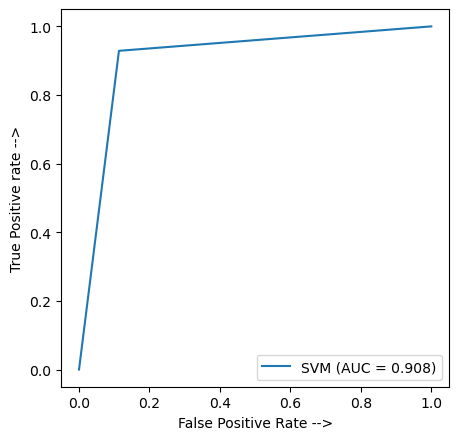

In [268]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_SVM, rfc_tpr_SVM, linestyle='-', label='SVM (AUC = %0.3f)' % auc_rfc_SVM)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

In [158]:
param_grid_SVM = [{
    'C':[0.5, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf','linear']},]

SVM_optimal_params = GridSearchCV(estimator=SVM_model, param_grid=param_grid_SVM, cv=10, n_jobs=-1)

SVM_optimal_params.fit(X_train, y_train)
print(SVM_optimal_params.best_params_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Single Run

In [160]:
SVM_model_opt = SVC(C=1, gamma=0.001, kernel='rbf')

SVM_model_opt.fit(X_train, y_train)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=1, gamma=0.001)

In [161]:
SVM_y_predicted_opt = SVM_model_opt.predict(X_test)

In [162]:
SVM_cm_opt = confusion_matrix(y_test, SVM_y_predicted_opt)
SVM_cm_opt

array([[657,  84],
       [ 46, 600]], dtype=int64)

Text(69.0, 0.5, 'Truth')

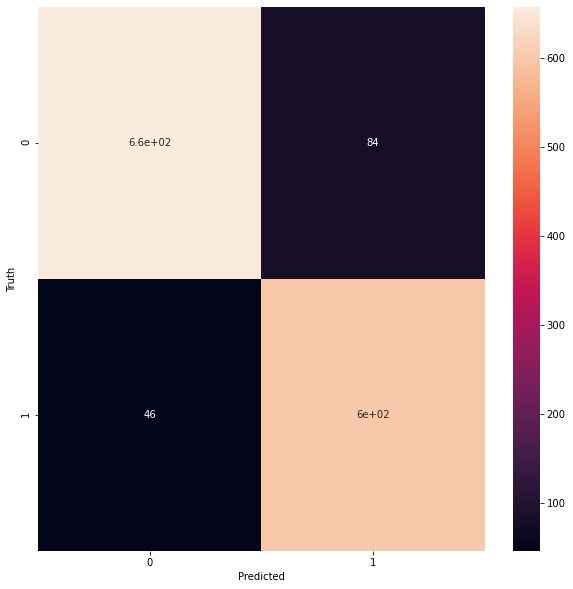

In [163]:
plt.figure(figsize=(10,10))
sns.heatmap(SVM_cm_opt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [164]:
SVM_model_opt.score(X_test, y_test)

0.9062725306416727

In [165]:
print('F1 Score: ', f1_score(y_test, SVM_y_predicted_opt))

F1 Score:  0.9022556390977443


In [167]:
rfc_fpr_SVM_opt, rfc_tpr_SVM_opt, threshold_SVM_opt = roc_curve(y_test, SVM_y_predicted_opt)
auc_rfc_SVM_opt = auc(rfc_fpr_SVM_opt, rfc_tpr_SVM_opt)

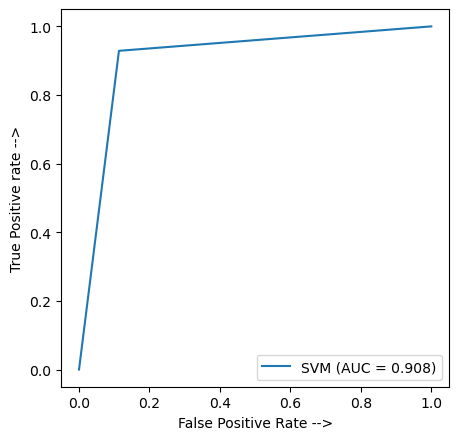

In [267]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_SVM_opt, rfc_tpr_SVM_opt, linestyle='-', label='SVM (AUC = %0.3f)' % auc_rfc_SVM_opt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

#### Multi Run

In [224]:

SVM_accuracy=[]
SVM_f1score=[]
SVM_roc=[]

for i in range(100):
    SVM_model_multi = SVC(C=1, gamma=0.001, kernel='rbf')
    SVM_model_multi.fit(X_train, y_train)
    
    SVM_y_predicted_multi = SVM_model_multi.predict(X_test)
    
    acc = accuracy_score(y_test, SVM_y_predicted_multi)
    SVM_accuracy.append(acc)
    
    f1 = f1_score(y_test, SVM_y_predicted_multi)
    SVM_f1score.append(f1)
    
    rfc_fpr_SVM, rfc_tpr_SVM, threshold_SVM = roc_curve(y_test, SVM_y_predicted_multi)
    auc_rfc_SVM = auc(rfc_fpr_SVM, rfc_tpr_SVM)
    SVM_roc.append(auc_rfc_SVM)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [225]:
acc_average = statistics.mean(SVM_accuracy)
f1_average = statistics.mean(SVM_f1score)
roc_average = statistics.mean(SVM_roc)

print(acc_average)
print(f1_average)
print(roc_average)

acc_max = max(SVM_accuracy)
f1_max = max(SVM_f1score)
roc_max = max(SVM_roc)

print(acc_max)
print(f1_max)
print(roc_max)

acc_min = min(SVM_accuracy)
f1_min = min(SVM_f1score)
roc_min = min(SVM_roc)

print(acc_min)
print(f1_min)
print(roc_min)

acc_stdev = np.std(SVM_accuracy)
f1_stdev = np.std(SVM_f1score)
roc_stdev = np.std(SVM_roc)

print(acc_stdev)
print(f1_stdev)
print(roc_stdev)

0.9062725306416727
0.9022556390977443
0.9077161228864016
0.9062725306416727
0.9022556390977443
0.9077161228864016
0.9062725306416727
0.9022556390977443
0.9077161228864016
2.220446049250313e-16
2.220446049250313e-16
0.0


## Logistic regression

#### Optimising

In [201]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_test, y_test)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [202]:
log_reg_y_predicted = log_reg_model.predict(X_test)

In [203]:
log_reg_cm = confusion_matrix(y_test, log_reg_y_predicted)
log_reg_cm

array([[665,  76],
       [ 55, 591]], dtype=int64)

Text(69.0, 0.5, 'Truth')

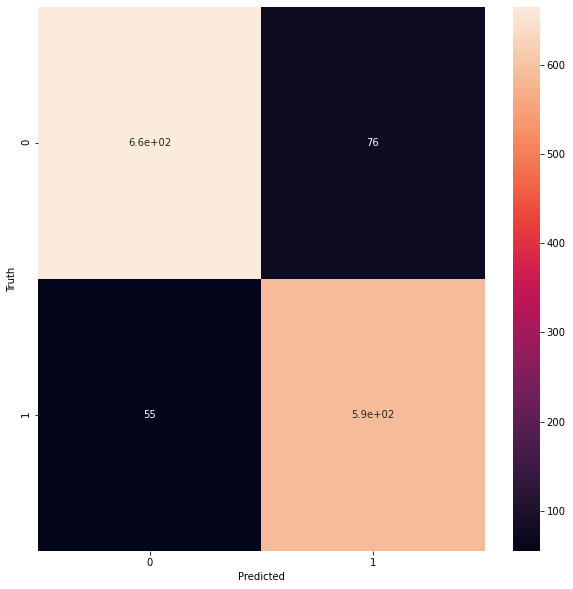

In [204]:
plt.figure(figsize=(10,10))
sns.heatmap(log_reg_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [205]:
log_reg_model.score(X_test, y_test)

0.905551550108147

In [206]:
print('F1 Score: ', f1_score(y_test, log_reg_y_predicted))

F1 Score:  0.9002284843869002


In [207]:
rfc_fpr_log_reg, rfc_tpr_log_reg, threshold_log_reg = roc_curve(y_test, log_reg_y_predicted)
auc_rfc_log_reg = auc(rfc_fpr_log_reg, rfc_tpr_log_reg)

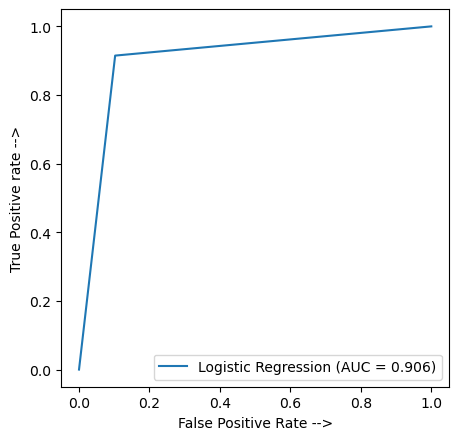

In [266]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_log_reg, rfc_tpr_log_reg, linestyle='-', label='Logistic Regression (AUC = %0.3f)' % auc_rfc_log_reg)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

In [209]:
param_grid_log_reg = [{
    'C': np.logspace(-4,4,20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [100,1000,2500,5000]},]


log_reg_optimal_params = GridSearchCV(estimator=log_reg_model, param_grid= param_grid_log_reg, cv=10, n_jobs=-1)

log_reg_optimal_params.fit(X_train, y_train)

print(log_reg_optimal_params.best_params_)

{'C': 1.623776739188721, 'max_iter': 100, 'solver': 'liblinear'}


C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [210]:
log_reg_model_opt = LogisticRegression(C=1.623776739188721, max_iter=100, solver='liblinear')
log_reg_model_opt.fit(X_test, y_test)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=1.623776739188721, solver='liblinear')

In [211]:
log_reg_y_predicted_opt = log_reg_model_opt.predict(X_test)

In [212]:
log_reg_cm_opt = confusion_matrix(y_test, log_reg_y_predicted_opt)
log_reg_cm_opt

array([[665,  76],
       [ 55, 591]], dtype=int64)

Text(69.0, 0.5, 'Truth')

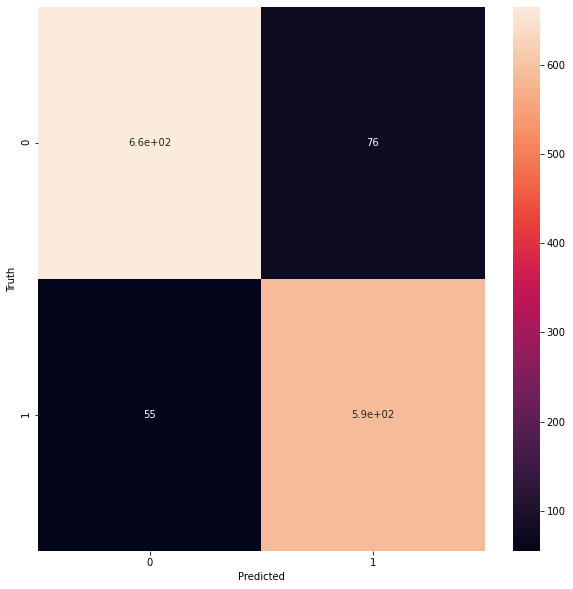

In [213]:
plt.figure(figsize=(10,10))
sns.heatmap(log_reg_cm_opt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [214]:
log_reg_model_opt.score(X_test, y_test)

0.905551550108147

In [215]:
print('F1 Score: ', f1_score(y_test, log_reg_y_predicted_opt))

F1 Score:  0.9002284843869002


In [216]:
rfc_fpr_log_reg_opt, rfc_tpr_log_reg_opt, threshold_log_reg_opt = roc_curve(y_test, log_reg_y_predicted_opt)
auc_rfc_log_reg_opt = auc(rfc_fpr_log_reg_opt, rfc_tpr_log_reg_opt)

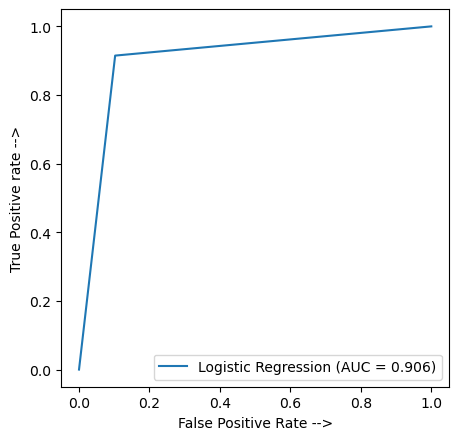

In [265]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_log_reg_opt, rfc_tpr_log_reg_opt, linestyle='-', label='Logistic Regression (AUC = %0.3f)' % auc_rfc_log_reg_opt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

#### Multi Run

In [232]:

log_reg_accuracy=[]
log_reg_f1score=[]
log_reg_roc=[]

for i in range(100):
    log_reg_model_multi = LogisticRegression(C=1.623776739188721, max_iter=100, solver='liblinear')
    log_reg_model_multi.fit(X_test, y_test)
    
    log_reg_y_predicted_multi = log_reg_model_multi.predict(X_test)
    
    acc = accuracy_score(y_test, log_reg_y_predicted_multi)
    log_reg_accuracy.append(acc)
    
    f1 = f1_score(y_test, log_reg_y_predicted_multi)
    log_reg_f1score.append(f1)
    
    rfc_fpr_log_reg, rfc_tpr_log_reg, threshold_log_reg = roc_curve(y_test, log_reg_y_predicted_multi)
    auc_rfc_log_reg = auc(rfc_fpr_log_reg, rfc_tpr_log_reg)
    log_reg_roc.append(auc_rfc_log_reg)

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\truek\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

In [233]:
acc_average = statistics.mean(log_reg_accuracy)
f1_average = statistics.mean(log_reg_f1score)
roc_average = statistics.mean(log_reg_roc)

print(acc_average)
print(f1_average)
print(roc_average)

acc_max = max(log_reg_accuracy)
f1_max = max(log_reg_f1score)
roc_max = max(log_reg_roc)

print(acc_max)
print(f1_max)
print(roc_max)

acc_min = min(log_reg_accuracy)
f1_min = min(log_reg_f1score)
roc_min = min(log_reg_roc)

print(acc_min)
print(f1_min)
print(roc_min)

acc_stdev = np.std(log_reg_accuracy)
f1_stdev = np.std(log_reg_f1score)
roc_stdev = np.std(log_reg_roc)

print(acc_stdev)
print(f1_stdev)
print(roc_stdev)

0.905551550108147
0.9002284843869002
0.9061482892752243
0.905551550108147
0.9002284843869002
0.9061482892752243
0.905551550108147
0.9002284843869002
0.9061482892752243
4.440892098500626e-16
3.3306690738754696e-16
0.0


## K-Nearest Neighbor

#### Optimising

In [234]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

<ipython-input-234-b91828b2874f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [235]:
knn_y_predicted = knn.predict(X_test)

In [237]:
knn_cm = confusion_matrix(y_test, knn_y_predicted)
knn_cm

array([[673,  68],
       [ 72, 574]], dtype=int64)

Text(69.0, 0.5, 'Truth')

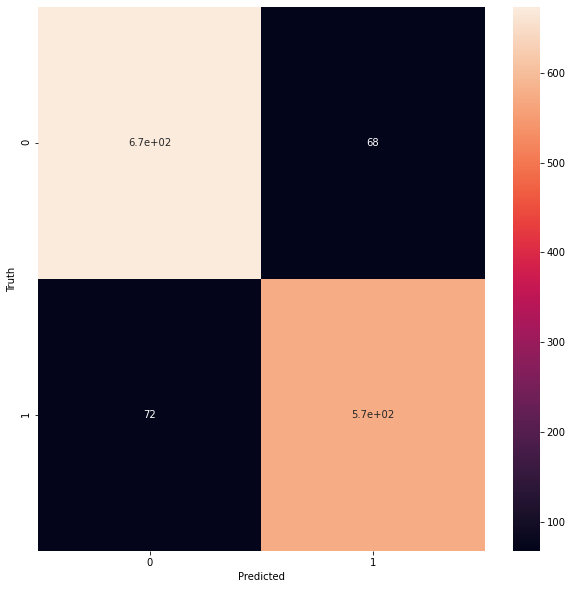

In [238]:
plt.figure(figsize=(10,10))
sns.heatmap(knn_cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [240]:
knn.score(X_test, y_test)

0.8990627253064167

In [241]:
print('F1 Score: ', f1_score(y_test, knn_y_predicted))

F1 Score:  0.8913043478260869


In [242]:
rfc_fpr_knn, rfc_tpr_knn, threshold_knn = roc_curve(y_test, knn_y_predicted)
auc_rfc_knn = auc(rfc_fpr_knn, rfc_tpr_knn)

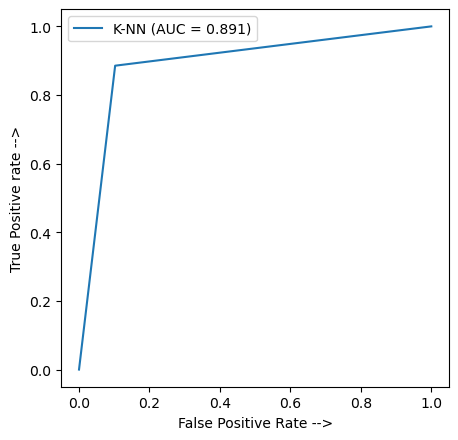

In [263]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_knn, rfc_tpr_knn, linestyle='-', label='K-NN (AUC = %0.3f)' % auc_rfc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

In [249]:
param_grid_knn = [{
        'n_neighbors': [1,2,3,4,5,6,7,8,9,10,20,30,40,50],
            },]


knn_optimal_params = GridSearchCV(estimator=knn, param_grid= param_grid_knn, cv=10, n_jobs=-1)

knn_optimal_params.fit(X_train, y_train)

print(knn_optimal_params.best_params_)

{'n_neighbors': 9}


C:\Users\truek\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [250]:
knn_opt = KNeighborsClassifier(n_neighbors=9)
knn_opt.fit(X_train, y_train)

<ipython-input-250-fed8149a2654>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_opt.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [251]:
knn_y_predicted_opt = knn_opt.predict(X_test)

In [252]:
knn_cm_opt = confusion_matrix(y_test, knn_y_predicted_opt)
knn_cm_opt

array([[665,  76],
       [ 74, 572]], dtype=int64)

Text(69.0, 0.5, 'Truth')

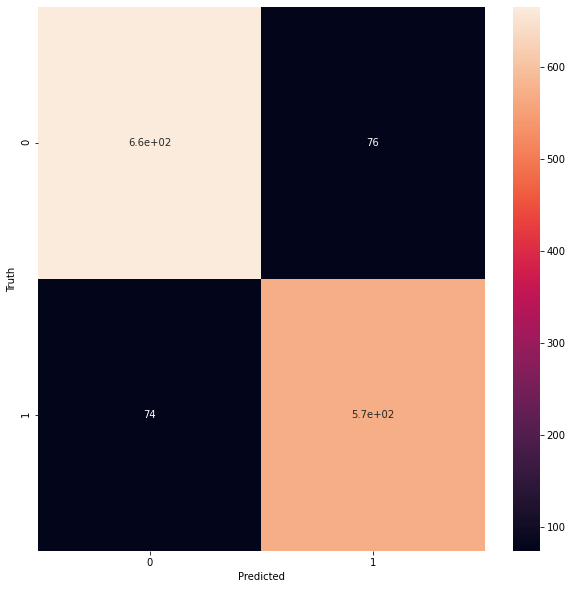

In [253]:
plt.figure(figsize=(10,10))
sns.heatmap(knn_cm_opt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [254]:
knn_opt.score(X_test, y_test)

0.8918529199711608

In [255]:
print('F1 Score: ', f1_score(y_test, knn_y_predicted_opt))

F1 Score:  0.8840803709428131


In [256]:
rfc_fpr_knn_opt, rfc_tpr_knn_opt, threshold_knn_opt = roc_curve(y_test, knn_y_predicted_opt)
auc_rfc_knn_opt = auc(rfc_fpr_knn_opt, rfc_tpr_knn_opt)

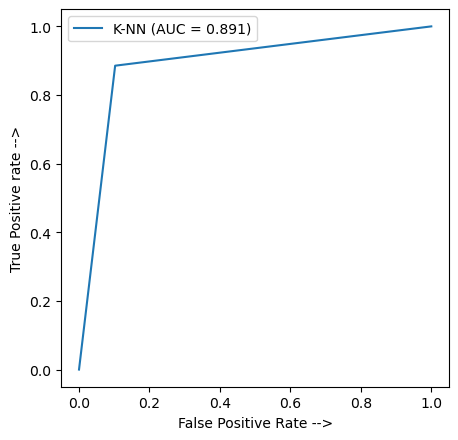

In [264]:
plt.figure(figsize=(5,5), dpi=100)
plt.plot(rfc_fpr_knn_opt, rfc_tpr_knn_opt, linestyle='-', label='K-NN (AUC = %0.3f)' % auc_rfc_knn_opt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive rate -->')

plt.legend()

plt.show()

#### Multi Runs

In [259]:

knn_accuracy=[]
knn_f1score=[]
knn_roc=[]

for i in range(100):
    knn_multi = KNeighborsClassifier(n_neighbors=9)
    knn_multi.fit(X_train, y_train)
    
    knn_y_predicted_multi = knn_multi.predict(X_test)
    
    acc = accuracy_score(y_test, knn_y_predicted_multi)
    knn_accuracy.append(acc)
    
    f1 = f1_score(y_test, knn_y_predicted_multi)
    knn_f1score.append(f1)
    
    rfc_fpr_knn, rfc_tpr_knn, threshold_knn = roc_curve(y_test, knn_y_predicted_multi)
    auc_rfc_knn = auc(rfc_fpr_knn, rfc_tpr_knn)
    knn_roc.append(auc_rfc_knn)

<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1

<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1

<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_multi.fit(X_train, y_train)
<ipython-input-259-846998f52c3e>:7: DataConversionWarning: A column-vector y was passed when a 1

In [260]:
acc_average = statistics.mean(knn_accuracy)
f1_average = statistics.mean(knn_f1score)
roc_average = statistics.mean(knn_roc)

print(acc_average)
print(f1_average)
print(roc_average)

acc_max = max(knn_accuracy)
f1_max = max(knn_f1score)
roc_max = max(knn_roc)

print(acc_max)
print(f1_max)
print(roc_max)

acc_min = min(knn_accuracy)
f1_min = min(knn_f1score)
roc_min = min(knn_roc)

print(acc_min)
print(f1_min)
print(roc_min)

acc_stdev = np.std(knn_accuracy)
f1_stdev = np.std(knn_f1score)
roc_stdev = np.std(knn_roc)

print(acc_stdev)
print(f1_stdev)
print(roc_stdev)

0.8918529199711608
0.8840803709428131
0.8914424069222832
0.8918529199711608
0.8840803709428131
0.8914424069222832
0.8918529199711608
0.8840803709428131
0.8914424069222832
1.1102230246251565e-16
0.0
1.1102230246251565e-16
